Name : Yash Bhanushali                                                            
Task : Perform Exploratory Data Analysis on dataset 'SampleSuperStore'

In [1]:
#import necesarry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('/content/SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Data Wrangling**      
Checking Duplicated values

In [9]:
df.duplicated().sum()

17

In [10]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<function matplotlib.pyplot.show>

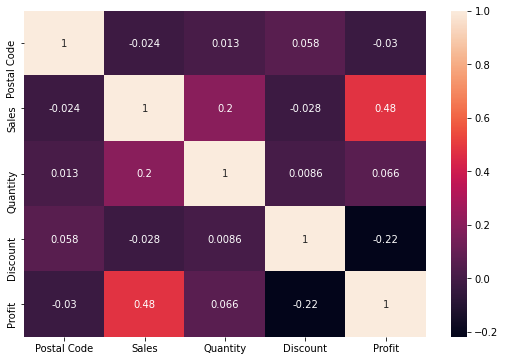

In [13]:
fig,axes = plt.subplots(1,1, figsize=(9,6))
sns.heatmap(df.corr(), annot=True)
plt.show

**Analyzing Sub-category**

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


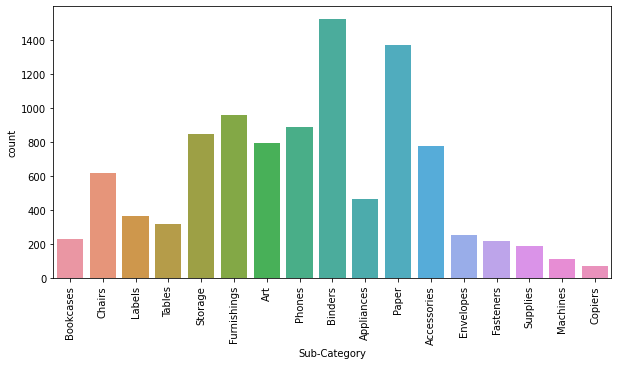

In [14]:
print(df['Sub-Category'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

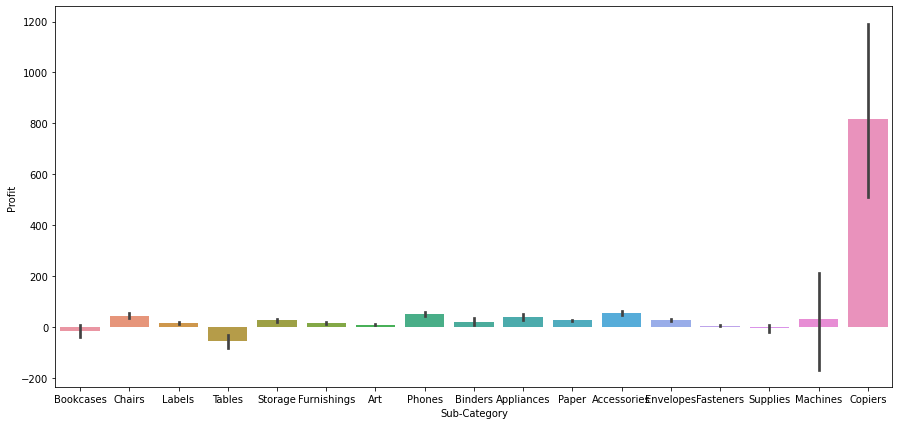

In [15]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['Sub-Category'], y=df['Profit'])

# Analyzing the Profits based on Category of Sales

In [16]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


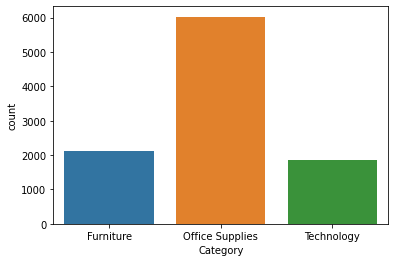

In [17]:
sns.countplot(df['Category'])

In [18]:
df[df['Category']=='Furniture'].Profit.sum()

18451.272800000006

In [19]:
df[df['Category']=='Office Supplies'].Profit.sum()

122490.8008

In [20]:
df[df['Category']=='Technology'].Profit.sum()

145454.9481

In [21]:
# Mean of the profits from Furniture
df[df['Category']=='Furniture'].Profit.sum()/len(df[df['Category']=='Furniture'])

8.699327109853845

In [22]:
# Mean of the profits from Office Supplies
df[df['Category']=='Office Supplies'].Profit.sum()/len(df[df['Category']=='Office Supplies'])

20.3270495851311

In [23]:
# Mean of the profits from Technology
df[df['Category']=='Technology'].Profit.sum()/len(df[df['Category']=='Technology'])

78.75200221981592

# Check if any numerical factor leads to better profit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


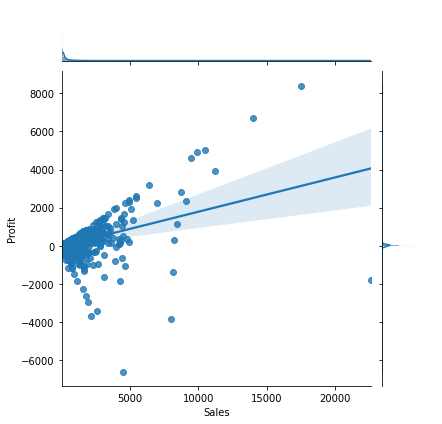

In [24]:
sns.jointplot(df['Sales'], df['Profit'], kind = "reg")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


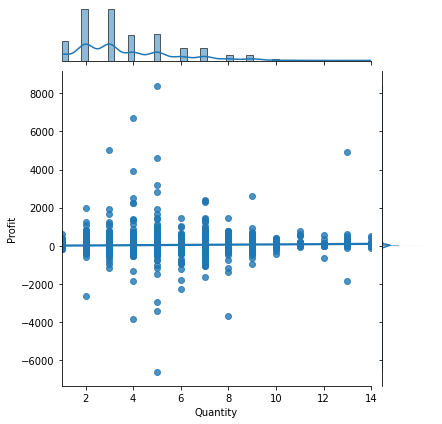

In [25]:
sns.jointplot(df['Quantity'], df['Profit'], kind = "reg")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


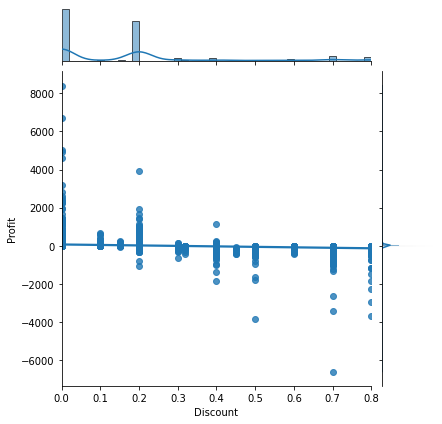

In [26]:
sns.jointplot(df['Discount'], df['Profit'], kind = "reg")
plt.show()

We can say that the Sales positively affects the Profits to some small level.
But, the Quantity and the Discounts don't affect the Profits to any high level, thus, it's a neutral effect.

# Analyzing the Profits classified by Shipping modes of the Super-store sales

In [27]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


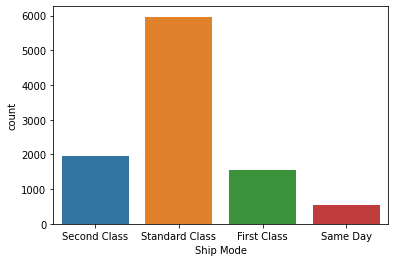

In [28]:
sns.countplot(df['Ship Mode'])

In [29]:
df[df['Ship Mode']=='Standard Class'].Profit.sum()

164088.7875

In [30]:
df[df['Ship Mode']=='Second Class'].Profit.sum()

57446.63540000001

In [31]:
df[df['Ship Mode']=='First Class'].Profit.sum()

48969.8399

In [32]:
df[df['Ship Mode']=='Same Day'].Profit.sum()

15891.7589

In [33]:
## Mean of Standard Class Profit:
df[df['Ship Mode']=='Standard Class'].Profit.sum()/len(df[df['Ship Mode']=='Standard Class'])

27.494770023458447

In [34]:
## Mean of Second Class Profit:
df[df['Ship Mode']=='Second Class'].Profit.sum()/len(df[df['Ship Mode']=='Second Class'])

29.53554519280206

In [35]:
## Mean of First Class Profit:
df[df['Ship Mode']=='First Class'].Profit.sum()/len(df[df['Ship Mode']=='First Class'])

31.839947919375813

In [36]:
## Mean of Same Day Profit:
df[df['Ship Mode']=='Same Day'].Profit.sum()/len(df[df['Ship Mode']=='Same Day'])

29.266590976058932

# Analyzing the Profits on the basis of different Segments

In [37]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


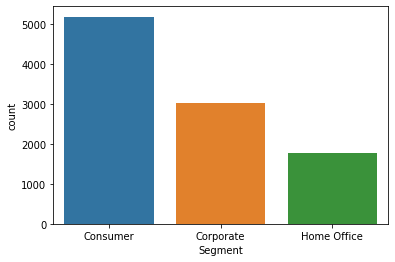

In [38]:
sns.countplot(df['Segment'])

In [39]:
df[df['Segment']=='Consumer'].Profit.sum()

134119.2092

In [40]:
df[df['Segment']=='Corporate'].Profit.sum()

91979.13399999999

In [41]:
df[df['Segment']=='Home Office'].Profit.sum()

60298.678499999995

In [42]:
## Mean of Consumer Segment Profits
df[df['Segment']=='Consumer'].Profit.sum()/len(df[df['Segment']=='Consumer'])

25.8368732806781

In [43]:
## Mean of Corporate Segment Profits
df[df['Segment']=='Corporate'].Profit.sum()/len(df[df['Segment']=='Corporate'])

30.456666887417217

In [44]:
## Mean of Home Office Segment Profits
df[df['Segment']=='Home Office'].Profit.sum()/len(df[df['Segment']=='Home Office'])

33.818664329781264

# Analyzing the profits on the basis of States

In [45]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


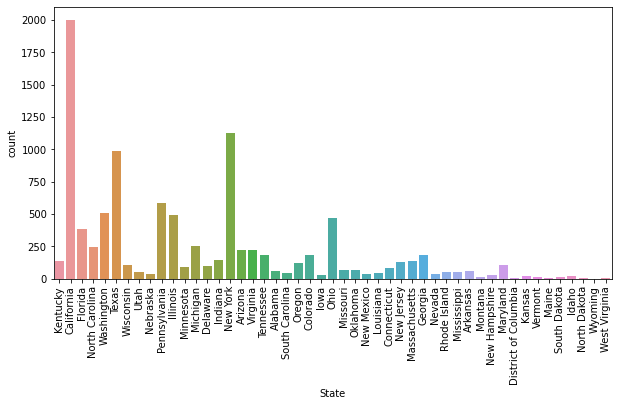

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.show()

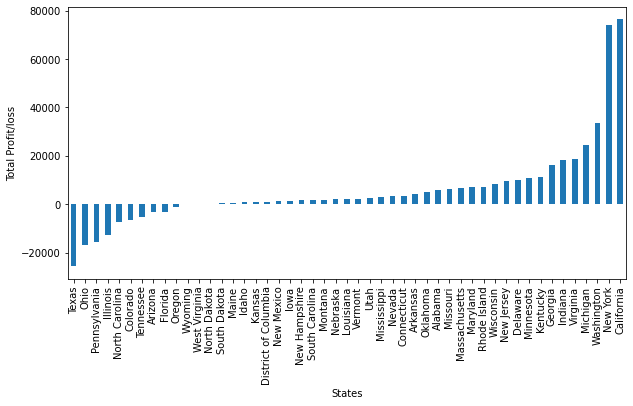

In [47]:
#total state-wise profit/loss
state_profit = df.groupby('State')['Profit'].sum().sort_values().plot.bar(figsize = (10,5))
plt.ylabel('Total Profit/loss') 
plt.xlabel('States')
plt.show()

In [48]:
d = {}
for x in df['State'].unique():
    mean_profit = df[df['State']==x].Profit.sum()/len(df[df['State']==x])
    d[x] = mean_profit

In [49]:
d = sorted(d.items(), key=lambda x: x[1])

In [50]:
len(d)

49

In [51]:
d[:10]

[('Ohio', -36.1863040511727),
 ('Colorado', -35.867351098901096),
 ('North Carolina', -30.083984738955827),
 ('Tennessee', -29.189582513661204),
 ('Pennsylvania', -26.507598466780237),
 ('Texas', -26.12117390862944),
 ('Illinois', -25.62578658536585),
 ('Arizona', -15.303234821428573),
 ('Oregon', -9.600568548387098),
 ('Florida', -8.87546135770235)]

# Problems:

### 1] The average Profits generated by Furniture is very low.
### 2] The average Profits generated by the Office Supplies is moderate.
### 3] The quantity of items don't impact on the Profits generated. This means, the profit generated per item is not consistent.
### 4] The discount given for the items also, doesn't effect in any more profits.
### 5] Some states have negative Mean Profits, i.e., no profits! 

# Solutions:
### 1] It's necessary to increase the sales of the Furniture to generate more profits.
### 2] Increase the profits generated by Office Supplies using a better recommendation system to accompany when a consumer buys the Furniture or Technology related items.
### 3] Regulating the proper prices to make better profits as the number of items increase.
### 4] the discounts should be properly manipulated when there is increase in the number of items.
### 5] Increase the profits in these states: ['Ohio', 'Colorado', 'North Carolina', 'Tennessee', 'Pennsylvania', 'Texas', 'Illinois', 'Arizona', 'Oregon', 'Florida']